PA2 Notebook 3: Visualization
===

This is the third notebook for DRWI Pollution Assessment Stage 2 (PA2) analysis.

It reads GeoDataFrames of calculated PA2 results prepared in Notebook 2 and plots hotspot maps.

# Installation and Setup

Carefully follow our **[Installation Instructions](README.md#get-started)**, especially including:
- Creating a virtual environment for this repository (step 3)

In [1]:
from pathlib import Path
from importlib import reload
import warnings

import pandas    as pd

# geo packages
import geopandas as gpd
from shapely.geometry import Polygon
import contextily as ctx

# packages for viz 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from  matplotlib.colors import LogNorm

# import colorcet and plotting libraries
import colorcet as cc
from colorcet.plotting import swatch, swatches, sine_combs

In [2]:
# Confirm that this repo is in your Python Path
!conda-develop /Users/aaufdenkampe/Documents/Python/pollution-assessment/src

path exists, skipping /Users/aaufdenkampe/Documents/Python/pollution-assessment/src
completed operation for: /Users/aaufdenkampe/Documents/Python/pollution-assessment/src


In [3]:
# Custom functions for Pollution Assessment
import pollution_assessment as pa
import pollution_assessment.calc
import pollution_assessment.plot
import pollution_assessment.plot_cc

In [4]:
print("Geopandas: ", gpd.__version__)
# print("spatialpandas: ", spd.__version__)
# print("datashader: ", ds.__version__)
# print("pygeos: ", pygeos.__version__)

Geopandas:  0.11.1


## Set Paths


In [5]:
# Set your project directory to your local folder for your clone of this repository
project_path = Path.cwd().parent
project_path

PosixPath('/Users/aaufdenkampe/Documents/Python/pollution-assessment')

In [6]:
# Assign relative paths for PA21 data INPUT folders. 
pa1_data_folder = Path('stage1/data/')
pa1_data_path = project_path / pa1_data_folder

In [7]:
# Assign relative paths for the PA2 data OUTPUT folder.
pa2_data_output_folder = Path('stage2/data_output')
data_output_path = project_path /pa2_data_output_folder

## Open Files from PA2 Notebook 2 & PA1

In [8]:
%%time
# Read PA2 calculated and combined results from Parquet files
reach_concs_gdf = gpd.read_parquet(data_output_path /'reach_concs_gdf.parquet')
catch_loads_gdf = gpd.read_parquet(data_output_path /'catch_loads_gdf.parquet')

CPU times: user 1.33 s, sys: 140 ms, total: 1.47 s
Wall time: 1.38 s


In [10]:
# Read DRWI geometries from PA1
cluster_gdf = gpd.read_parquet(pa1_data_path / 'cluster_df.parquet')

focusarea_gdf = gpd.read_parquet(pa1_data_path /'fa_phase2_df.parquet')
focusarea_gdf.cluster = focusarea_gdf.cluster.replace('Kirkwood Cohansey Aquifer', 'Kirkwood - Cohansey Aquifer') # update name for consistency with other files 
focusarea_gdf.set_index('name', inplace=True)

In [16]:
# Test plotting with PA1 parquet files
base_catch_gdf = gpd.read_parquet(pa1_data_path  /'base_df_catch.parquet')
base_reach_gdf = gpd.read_parquet(pa1_data_path /'base_df_reach.parquet')


In [38]:
%%time
# Reproject CRS for all PA1 GeoDataFrames to 3857
gdfs = [
    base_catch_gdf, base_reach_gdf, 
    # rest_catch_gdf, rest_reach_gdf, point_src_gdf, proj_prot_gdf, proj_rest_gdf, 
    cluster_gdf, focusarea_gdf,
]

for gdf in gdfs:
    gdf.to_crs(epsg=3857, inplace=True)

CPU times: user 5.68 s, sys: 31.6 ms, total: 5.71 s
Wall time: 5.74 s


# Viz stuff
From `stage1/WikiSRAT_ColorMap_Playground+AKA.ipynb`.

In [12]:
# read cities file
cities = pd.read_csv(pa1_data_path / 'us_cities.csv')
cities.head() 

# create geometry column
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(cities['LONGITUDE'], cities['LATITUDE'])]

# establish coordinate reference system as WGS84 first 
# then transform to pseudo-mercator in a second step
crs = {'init': 'epsg:4326'}

cities_gdf = gpd.GeoDataFrame(cities, crs=crs, geometry=geometry)

# transform from WGS84 'epsg:4326' to WGS84 Pseudo Mercator epsg=3857
cities_gdf.to_crs(epsg=3857, inplace=True)

cities_gdf.head(3)

/Users/aaufdenkampe/opt/anaconda3/envs/drwi_pa/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE,geometry
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778,POINT (-17945567.759 7558360.314)
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330,POINT (-17966111.994 8601033.440)
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325,POINT (-17944626.775 8600753.808)


# Plot Data for Pollution Assessment

In [23]:
warnings.filterwarnings('ignore', message='.*This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.*')

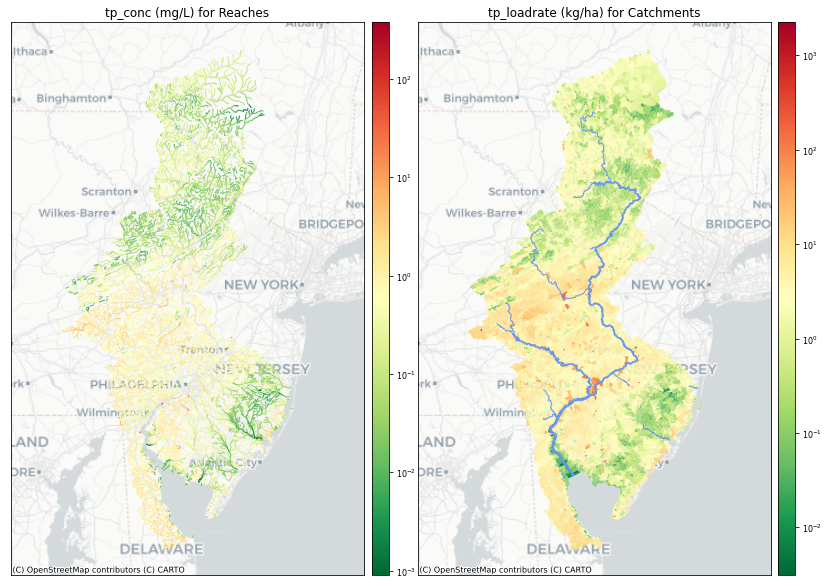

CPU times: user 7.98 s, sys: 84.9 ms, total: 8.06 s
Wall time: 7.34 s


In [24]:
pa.plot.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    include_reach=True
        )

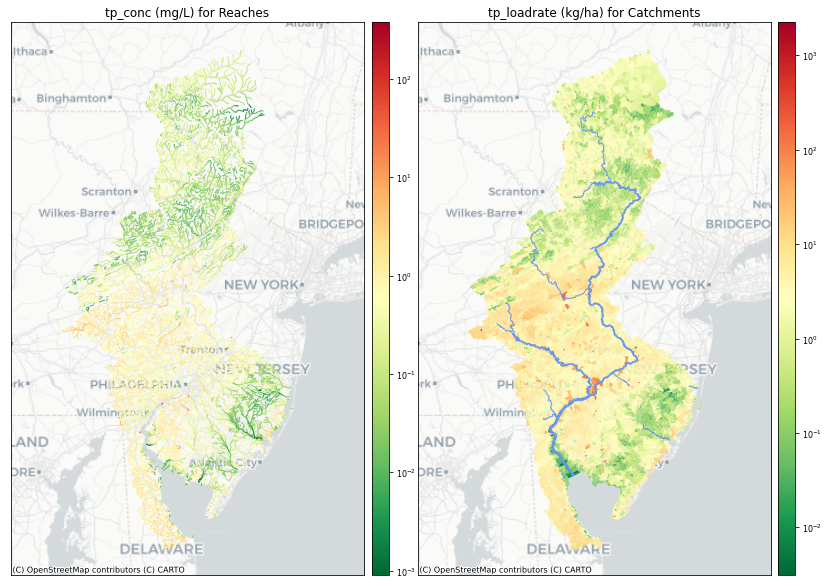

In [29]:
pa.plot_cc.PlotMaps(
    reach_concs_gdf, catch_loads_gdf,
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    # colormap='cet_CET_CBTL4_r',
    include_reach=True
)

Cluster Name =  Brandywine and Christina


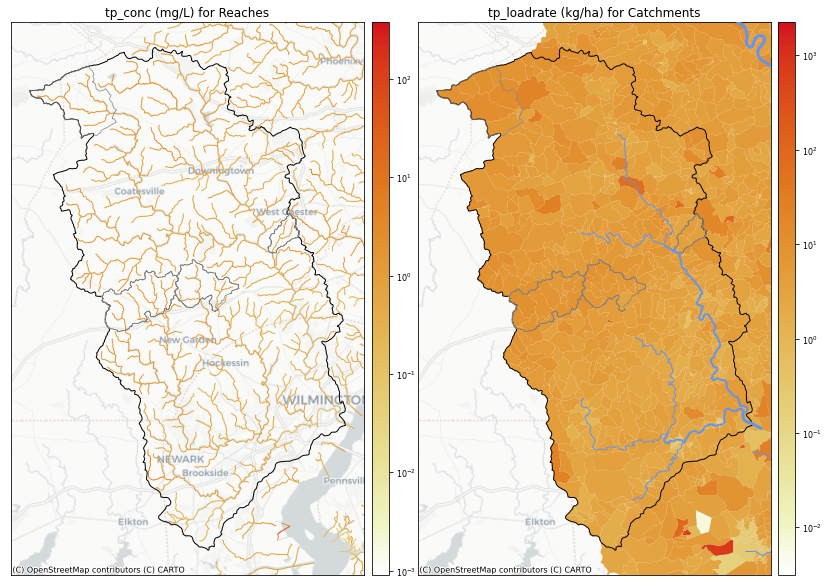

In [47]:
# test on a vertically-aligned cluster
pa.plot_cc.PlotMaps(
    reach_concs_gdf, catch_loads_gdf, 
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    colormap='cet_CET_L18', 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    include_reach = True,
)

In [30]:
# Reload module to apply any new edits to functions
reload(pa.calc)
reload(pa.plot)
reload(pa.plot_cc)

<module 'pollution_assessment.plot_cc' from '/Users/aaufdenkampe/Documents/Python/pollution-assessment/src/pollution_assessment/plot_cc.py'>

## PA1 plot tests

In [43]:
# Define a function to loop through all the pollutants in a data frame
# for speed and ease that can also be applied to restoration dataframes.

def CalcLoadRate(df):
    for pollutant in ['tn','tp','tss']:
        df[f'{pollutant}_loadrate'] = df[f'{pollutant}_load'] / df.catchment_hectares
    return df

In [44]:
# Apply to the base model run catchments
base_catch_gdf = CalcLoadRate(base_catch_gdf)

Cluster Name =  Brandywine and Christina


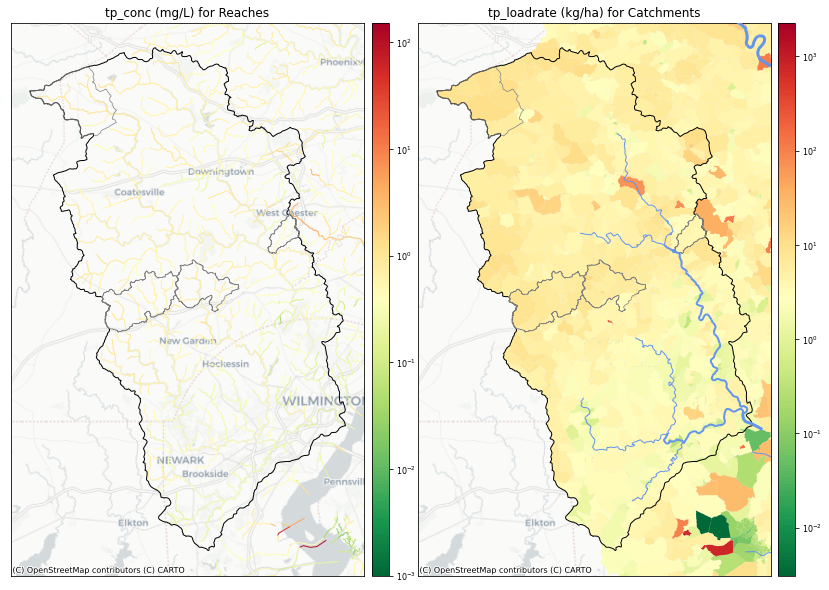

In [45]:
# test PA1 data on a vertically-aligned cluster
pa.plot.PlotMaps(
    base_reach_gdf, base_catch_gdf, 
    'tp_conc', 'tp_loadrate', 
    pa.calc.tp_conc_target, pa.calc.tp_loadrate_target, 
    # colormap='cet_CET_CBTL4_r', 
    cl=cluster_gdf.index[2], cluster_gdf=cluster_gdf,
    fa=True, focusarea_gdf=focusarea_gdf, zoom=True, 
    include_reach = True,
)